### Import library

In [1]:
import numpy as np
import control as co
import sympy as sym
import matplotlib.pyplot as plt

### Poles of a transfer function

The poles of a transfer function are 
<ol> <li>The values of the Laplace transform variable,<b> $s$</b>, that cause the transfer function to become infinite or</li> 
<li>Any roots of the denominator of the
transfer function that are common to roots of the numerator.</li><ol><br>
Strictly speaking, the poles of a transfer function satisfy part (1) of the definition.
For example, the roots of the characteristic polynomial in the denominator are values of <b>$s$</b> that make the transfer function infinite, so they are thus poles. However, if a factor of the denominator can be canceled by the same factor in the numerator, the root of this factor no longer causes the transfer function to become infinite.<blockquote> In control systems, we often refer to the root of the canceled factor in the denominator as a pole even though
the transfer function will not be infinite at this value. Hence, we include part (2) of the definition.</blockquote>

### Zeros of a Transfer Function

The zeros of a transfer function are <ol><li>The values of the Laplace transform variable, s, that
cause the transfer function to become zero, or <li>Any roots of the numerator of the transfer
function that are common to roots of the denominator.</li></ol>
Strictly speaking, the zeros of a transfer function satisfy part (1) of this definition. For
example, the roots of the numerator are values of s that make the transfer function zero and
are thus zeros. However, if a factor of the numerator can be canceled by the same factor in
the denominator, the root of this factor no longer causes the transfer function to become
zero. <blockquote>In control systems, we often refer to the root of the canceled factor in the numerator as
a zero even though the transfer function will not be zero at this value. Hence, we include part
(2) of the definition.</blockquote>

### Poles and Zeros of a First-Order System
$$G(s)=\dfrac{(s+2)}{(s+5)}$$

In [2]:
s=co.tf('s')
G=(s+2)/(s+5)
G

TransferFunction(array([1, 2]), array([1, 5]))

In [3]:
G.pole()

array([-5.])

In [4]:
G.zero()

array([-2.])

(array([-5.]), array([-2.]))

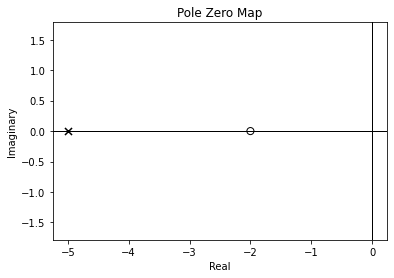

In [5]:
co.pzmap(G, grid=False)

Given the transfer function G(s) in a pole exists at $s=-5$, and a zero exists at $s=-2$ using an × for the pole
and a ○ for the zero. To show the properties of the poles and zeros, let us find the unit step response of the system.

### Step Response

Text(0.5, 1.0, 'step response')

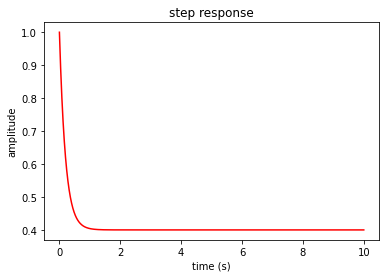

In [15]:
t = np.linspace(0, 10, 1000) # time is taken from 0s to 10s
_, y = co.step_response(G, t) # calculate the step response of G1
fig,ax=plt.subplots()
ax.plot(t, y, color='red') # plot the response
ax.set_xlabel('time (s)') # labels
ax.set_ylabel('amplitude') # labels
ax.set_title('step response') # title

$C(s)=\dfrac {(s+2)}{(s+5)s}$

In [17]:
s,t=sym.symbols('s t')
C=(s+2)/((s+5)*s)
C

(s + 2)/(s*(s + 5))

In [21]:
sym.expand(sym.inverse_laplace_transform(C,s,t))

2*Heaviside(t)/5 + 3*exp(-5*t)*Heaviside(t)/5

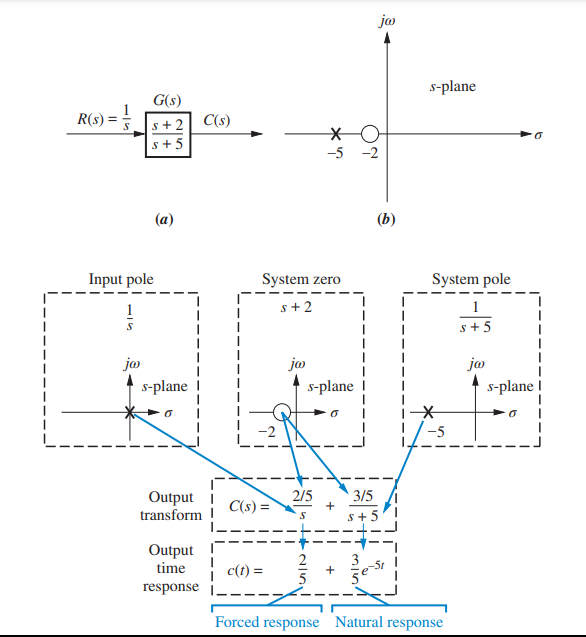

1. A pole of the input function generates the form of the forced response (that is, the pole at
the origin generated a step function at the output).
2. A pole of the transfer function generates the form of the natural response (that is, the pole
at -5 generated $e^{-5t}$.
3. A pole on the real axis generates an exponential response of the form $e^{-αt}$
, where α is
the pole location on the real axis. Thus, the farther to the left a pole is on the negative real
axis, the faster the exponential transient response will decay to zero (again, the pole at -5
generated $e^-{5t}$
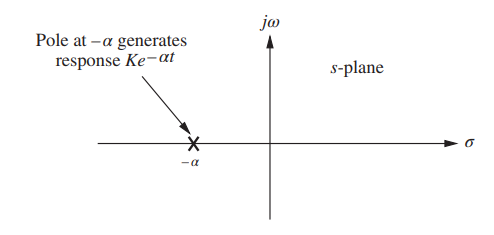
4. The zeros and poles generate the amplitudes for both the forced and natural responses

### Impulse Response

In [22]:
G

TransferFunction(array([1, 2]), array([1, 5]))

C:\Users\HP-NPC\anaconda3\lib\site-packages\control\timeresp.py:800: UserWarning: System has direct feedthrough: ``D != 0``. The infinite impulse at ``t=0`` does not appear in the output.
Results may be meaningless!
  warnings.warn("System has direct feedthrough: ``D != 0``. The "


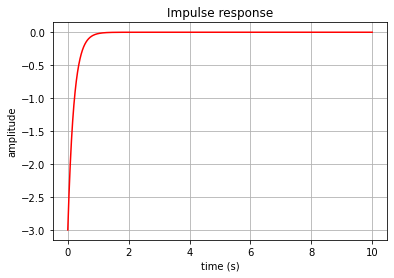

In [23]:
t = np.linspace(0, 10, 1000) # time is taken from 0s to 10s
_, y = co.impulse_response(G, t) # calculate the impulse response of G1

fig,ax=plt.subplots()
ax.plot(t, y, color='red') # plot the response
ax.set_xlabel('time (s)') # labels
ax.set_ylabel('amplitude') # labels
ax.set_title('Impulse response') # title
ax.grid()

Now let us compare the step response of 2nd order systems (without zeros) $G(s)=\dfrac{\omega_n ^2}{s^2+2\zeta\omega_n s + \omega_n ^2}$, for $\omega_n = 1$ (undamped natural freq. = 1 rad/s) and different values of $\zeta$ (the damping ratio).

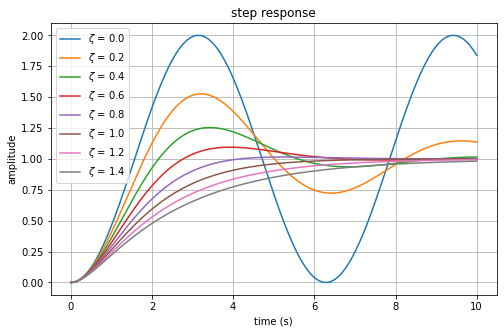

In [25]:
t = np.linspace(0, 10, 1000)                # time is taken from 0s to 10s
plt.figure(figsize=(8, 5))                  # to make a bigger figure

# we are varying zeta from 0.0 to 1.4 in the steps of 0.2
for zeta in np.arange(0, 1.6, 0.2):   
    G = co.tf([1], [1, 2*zeta, 1])            # define the transfer function as G
    _, y = co.step_response(G, t)             # calculate the step response of G
    plt.plot(t, y, label=f'$\zeta$ = {zeta:.2}') # plot the response

plt.xlabel('time (s)')                      # labels
plt.ylabel('amplitude')                     # labels
plt.title('step response')                  # title
plt.legend()                                # legend for each of the plots
plt.grid()     

### Forced Response

Now lets calculate the response of the system $G = \dfrac{2}{s+2}$ when excited with a square pulse. This is very similar to charging and discharging a series R-C circuit.

In [27]:
from scipy import signal

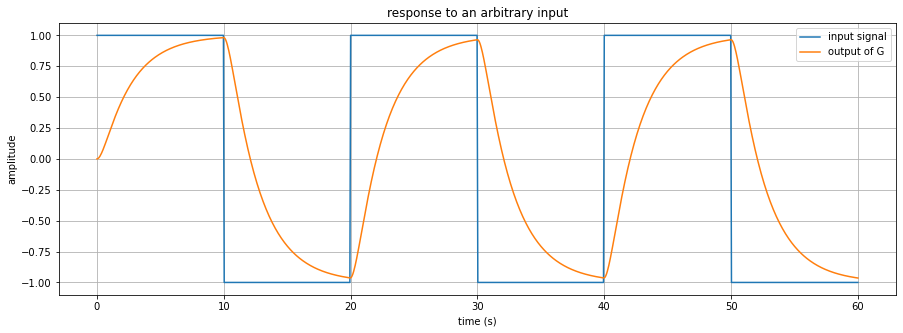

In [36]:

t = np.linspace(0, 60, 1000)                # time is taken from 0s to 10s
square=signal.square(2*np.pi*50*t)          # let us create a square pulse
plt.figure(figsize=(15, 5))                 # to make a long figure
   
plt.plot(t, square, label='input signal')        # and plot it

G6 = co.tf([2], [1, 2])                     # define the system G6
# calculate the response of G6 when the input is the square pulse input x
_, y, _ = co.forced_response(G, t, square)

plt.plot(t, y, label='output of G')        # plot the output
plt.xlabel('time (s)')                      # labels
plt.ylabel('amplitude')                     # labels
plt.title('response to an arbitrary input') # title
plt.legend()                                # legend for each of the plots
plt.grid()         